In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
k_df  = pd.read_csv("exoplanet_data.csv")

In [3]:
# k_df.info()

In [4]:
# k_df.head()

### ID columns:

#### "rowid"
int (serial)<br>
comment: df index<br>

#### "kepid"
int<br>
comment: Event with more than one capture possible per event.<br>

#### "kepoi_name"
object<br>
comment: Capture event (<strong>use this</strong>).

#### "kepler_name"
object<br>
comment: similar to kepoi name, but with letters for discrete captures, and sparse.

#### Drop: "rowid", "kepid", "kepler_name"

---

In [5]:
k_df_x = k_df.copy()

In [6]:
k_df_x.drop(columns = ["rowid", "kepid", "kepler_name"], inplace = True)

---

### Responses:

#### koi_disposition:
object<br>
comment: disposition in the literature towards this candidate. levels: CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.<br>

#### koi_pdisposition:
object<br>
comment: disposition of Kepler data analysis towards this exoplanet candidate. levels: FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.

#### koi_score:
float64<br>
comment: value between 0 and 1; indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

---

#### Options for analysis:

<ol>
    <li>Use koi_pdiposition (two levels, making logit possible...but candidates not validated).</li>
    <li>Use koi_disposition (would have to use CONFIRMED/FALSE POSITIVE as levels and subset CANDIDATE for prediction).
</ol>

Decision: will try it both ways

For now...

<strong>drop "koi_score"</strong>

In [7]:
k_df_x.drop(columns = ["koi_score"], inplace = True)

---

### Make response categories lowercase acronyms

FALSE POSITIVE: n<br>
CONFIRMED: y<br>
CANDIDATE: m<br>

In [8]:
k_df_x.koi_disposition.value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [9]:
k_df_x["koi_disposition"].replace(["FALSE POSITIVE"], ["n"], inplace = True)
k_df_x["koi_disposition"].replace(["CONFIRMED"], ["y"], inplace = True)
k_df_x["koi_disposition"].replace(["CANDIDATE"], ["m"], inplace = True)

In [10]:
k_df_x.koi_pdisposition.value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

In [11]:
k_df_x["koi_pdisposition"].replace(["FALSE POSITIVE"], ["n"], inplace = True)
k_df_x["koi_pdisposition"].replace(["CANDIDATE"], ["m"], inplace = True)

---

### Determine the proportion of missing data for each feature:

In [12]:
prop_na = (k_df_x.isna().sum() / len(k_df_x)).to_frame(name = "relative_freq").sort_values(by = "relative_freq", ascending = False)
prop_na

,relative_freq
koi_teq_err1,1.000000
koi_teq_err2,1.000000
koi_steff_err2,0.050502
koi_steff_err1,0.048934
koi_srad_err2,0.048934
koi_srad_err1,0.048934
koi_slogg_err2,0.048934
koi_slogg_err1,0.048934
koi_depth_err1,0.047470
koi_duration_err2,0.047470


Visualize prop_na with barplot...

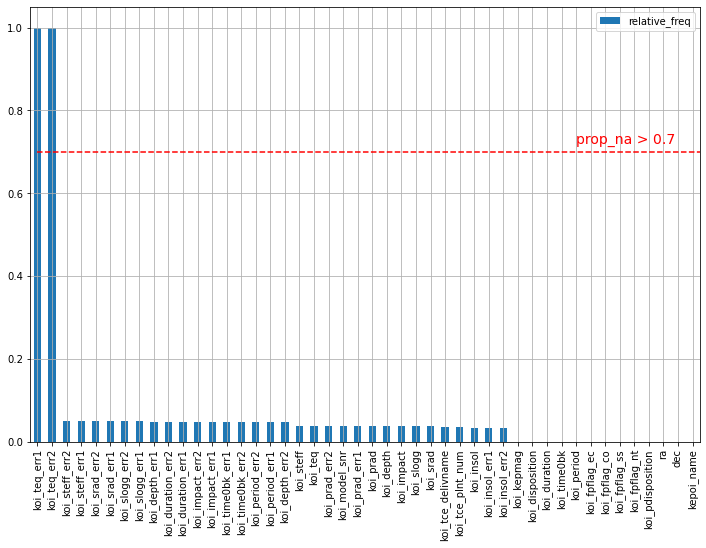

In [13]:
my_bar = prop_na.plot(kind = "bar", grid = True, figsize = (12, 8))
my_bar.plot([0., 46], [0.7, 0.7], "k--", color = "red")
plt.text(37, 0.72, "prop_na > 0.7", color = "red", fontsize = 14)
plt.show()

#### Remove empty features:

"koi_teq_err1"<br>
"koi_teq_err1"

In [14]:
k_df_x.drop(columns = ["koi_teq_err1", "koi_teq_err2"], inplace = True)

---

### Binary features:

In [15]:
k_df_x["koi_fpflag_nt"].replace([0], ["negative"], inplace = True)
k_df_x["koi_fpflag_nt"].replace([1], ["positive"], inplace = True)

k_df_x["koi_fpflag_ss"].replace([0], ["negative"], inplace = True)
k_df_x["koi_fpflag_ss"].replace([1], ["positive"], inplace = True)

k_df_x["koi_fpflag_co"].replace([0], ["negative"], inplace = True)
k_df_x["koi_fpflag_co"].replace([1], ["positive"], inplace = True)

k_df_x["koi_fpflag_ec"].replace([0], ["negative"], inplace = True)
k_df_x["koi_fpflag_ec"].replace([1], ["positive"], inplace = True)

In [16]:
# Check?
# k_df_x.info()

### Make histograms for float64 colums

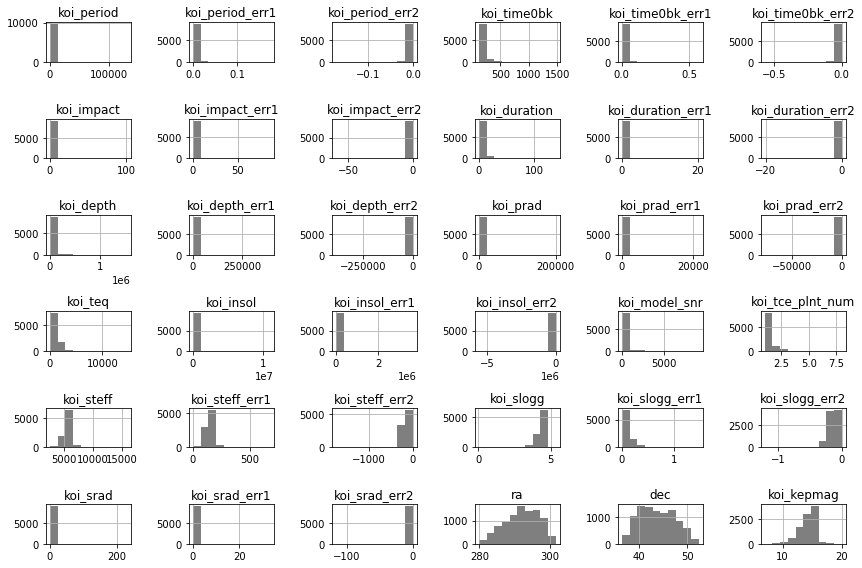

In [17]:
k_df_x.hist(color='k', alpha=0.5, bins=10, figsize = (12,8))
plt.tight_layout()
plt.show()

#### Lots of skewed distributions!!!

* Because they are predictors, I am going to keep them in (for now).

* Should use <strong>median</strong> when imputing (not the mean).

In [18]:
# koi_period_max = k_df_x[["koi_period"]].max()[0]

In [19]:
# k_df_x = k_df_x[k_df_x["koi_period"] != koi_period_max]

In [20]:
# k_df_x[["koi_period"]].hist(color='k', alpha=0.5, bins=10, figsize = (12,8))
# plt.tight_layout()
# plt.show()

In [21]:
k_df_x.describe()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,1334.744046,0.008243,0.008243,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.241843,0.000000,-0.173000,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,129995.778400,0.173000,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [22]:
# Check to make sure there are no invarint columns
# k_df_x.var()

In [23]:
k_df_x.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,K00752.01,y,m,negative,negative,negative,negative,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,K00752.02,y,m,negative,negative,negative,negative,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,K00753.01,n,n,negative,positive,negative,negative,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,K00754.01,n,n,negative,positive,negative,negative,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,K00755.01,y,m,negative,negative,negative,negative,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


#### Check for duplicated rows:

In [25]:
k_df_x.duplicated().sum()

0

In [26]:
k_df_x.to_csv("exoplanet_data_cleaned.csv")